**Instituto Tecnológico de Costa Rica**

**Escuela de Ingeniería en Computación**

**Maestría Académica en Ciencias de la Computación**

**Curso: Electiva Deep Learning**

**Segundo Semestre 2024**

**Profesor: Dr. Luis-Alexander Calvo-Valverde**

---

**Trabajo Práctico:** 1

**Datos de la entrega:** Jueves 26 de setiembre 2024, a más tardar a las 6:00 pm

**Medio de entrega**: Por medio del TEC-Digital.

**Entregables**: Un archivo jupyter ( .IPYNB ) y todos los archivos adiconales que se requieran para correr su Cuaderno (En un archivo comprimido). En caso de requerir mucho espacio, solicitarle al profesor una carpeta en One-Drive para subir la solución.

---

**Estudiantes:**
- Estudiante 1
- Estudiante 2



## Leer esto primero.

1. Usted puede cambiar el dataset que se le proporciona por otro  que sea de su interés; pero de hacerlo, se le recomienda valorarlo con el profesor para que su dataset propuesto no le agregue una complicación importante al Trabajo Práctico.

1. En caso de que el diseño experimental supere en mucho la capacidad de procesamiento computacional que puede conseguir, se le recomienda hablar con el profesor para valorar opciones como disminuir el tamaño del dataset.

## Indicaciones generales que deben seguir:

1. Se le proporciona el conjunto de datos y una hoja electrónica con detalles del dataset.

1. Realizarán clasificación y el atributo a predecir es: **melanocytic**.

1. Ustedes deben ir tomando las decisiones en el proceso y documentarlas en celdas de texto y además su código debe venir ampliamente comentado.

1. Se dividirá el dataset en tres conjuntos de datos: train (60%), validation (20%) y test (20%).

1. Ustedes proponen el diseño experimental (quiero ver qué han entendido de este concepto fundamental).

# Parte 1.  Experimentación con capas totalmente conectadas y un selector de hiperparámetros

1. Debe proponer una red neuronal artificial que solo incluya capas totalmente conectadas. Para la selección de hiperparámetros debe utilizar una herramienta especializada para esto (como keras tunner).






In [6]:
import pandas as pd

file_path = r"metadata.csv"
data = pd.read_csv(file_path)

# verify the data
data.head()


,isic_id,attribution,copyright_license,age_approx,anatom_site_general,benign_malignant,concomitant_biopsy,diagnosis,diagnosis_confirm_type,image_type,lesion_id,melanocytic,sex
0,ISIC_0024306,"ViDIR Group, Department of Dermatology, Medica...",CC-BY-NC,45.0,NaN,benign,False,nevus,serial imaging showing no change,dermoscopic,IL_7252831,True,male
1,ISIC_0024307,"ViDIR Group, Department of Dermatology, Medica...",CC-BY-NC,50.0,lower extremity,benign,False,nevus,serial imaging showing no change,dermoscopic,IL_6125741,True,male
2,ISIC_0024308,"ViDIR Group, Department of Dermatology, Medica...",CC-BY-NC,55.0,NaN,benign,False,nevus,serial imaging showing no change,dermoscopic,IL_3692653,True,female
3,ISIC_0024309,"ViDIR Group, Department of Dermatology, Medica...",CC-BY-NC,40.0,NaN,benign,False,nevus,serial imaging showing no change,dermoscopic,IL_0959663,True,male
4,ISIC_0024310,"ViDIR Group, Department of Dermatology, Medica...",CC-BY-NC,60.0,anterior torso,malignant,True,melanoma,histopathology,dermoscopic,IL_8194852,True,male


In [7]:
import os
from PIL import Image
import numpy as np

image_folder = 'ISIC-images/'

# Function to load and preprocess an image
def load_image(image_id, target_size=(128, 128)):
    image_path = os.path.join(image_folder, f'{image_id}.jpg')
    img = Image.open(image_path).resize(target_size)
    # Normalize the image
    img = np.array(img) / 255.0  
    return img

# Apply the function to all image IDs in the CSV
image_data = []
for image_id in data['isic_id']:
    try:
        img = load_image(image_id)
        image_data.append(img)
    except FileNotFoundError:
        print(f"Image {image_id} not found")

# Convert to a NumPy array
X_images = np.array(image_data)



In [8]:
# Labels are in the 'melanocytic' column
y_labels = data['melanocytic'].values

# Split the dataset into training, validation, and test sets
from sklearn.model_selection import train_test_split

X_train, X_temp, y_train, y_temp = train_test_split(X_images, y_labels, test_size=0.4, random_state=42)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42)

X_train.shape, X_val.shape, X_test.shape


((7032, 128, 128, 3), (2344, 128, 128, 3), (2344, 128, 128, 3))

In [4]:
from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten
from tensorflow.keras.layers import Conv2D, MaxPooling2D
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Flatten, Dense

# image-based model with fully connected layers
def build_image_model():
    model = Sequential()
    
    # Flatten the image input (128x128x3) into a 1D vector
    model.add(Flatten(input_shape=(128, 128, 3)))
    
    # Add a few fully connected (dense) layers
    model.add(Dense(512, activation='relu'))  # First dense layer
    model.add(Dense(256, activation='relu'))  # Second dense layer
    model.add(Dense(128, activation='relu'))  # Third dense layer

    # Output layer for binary classification
    model.add(Dense(1, activation='sigmoid'))  # Sigmoid for binary classification
    
    # Compile the model
    model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
    
    return model



2024-09-10 22:26:50.646936: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:485] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-09-10 22:26:50.718177: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:8454] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-09-10 22:26:50.740467: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1452] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2024-09-10 22:26:50.850349: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2024-09-10 22:26:52.262590: W tensorflow/compiler/tf2

In [5]:
import keras_tuner as kt
from tensorflow.keras.layers import Flatten, Dense
from tensorflow.keras.models import Sequential

# Function to build the model for hyperparameter tuning
def build_tuner_model(hp):
    model = Sequential()

    # Flatten the image input (128x128x3) into a 1D vector
    model.add(Flatten(input_shape=(128, 128, 3)))
    
    # Tune the number of dense layers (1 to 4)
    for i in range(hp.Int('num_dense_layers', 1, 4)):
        # Tune the number of units in each Dense layer (between 32 and 512)
        hp_units = hp.Int(f'units_{i}', min_value=32, max_value=512, step=32)
        model.add(Dense(units=hp_units, activation='relu'))
    
    # binary classification
    model.add(Dense(1, activation='sigmoid'))
    
    # Tune the learning rate
    hp_learning_rate = hp.Choice('learning_rate', values=[1e-2, 1e-3, 1e-4])
    model.compile(optimizer=keras.optimizers.Adam(learning_rate=hp_learning_rate),
                  loss='binary_crossentropy', metrics=['accuracy'])
    
    return model

# Initialize the tuner
tuner = kt.Hyperband(build_tuner_model,
                     objective='val_accuracy',
                     max_epochs=20,
                     factor=3,
                     directory='tuner_dir',
                     project_name='melanocytic_classification_fine_tuning')

# Perform the hyperparameter search
tuner.search(X_train, y_train, epochs=10, validation_data=(X_val, y_val), batch_size=32)



Trial 28 Complete [00h 00m 26s]
val_accuracy: 0.770477831363678

Best val_accuracy So Far: 0.8263651728630066
Total elapsed time: 02h 47m 43s


In [6]:
# Get the optimal hyperparameters
# Get the optimal hyperparameters
best_hps = tuner.get_best_hyperparameters(num_trials=1)[0]

# Print the best hyperparameters
print(f"Best number of layers: {best_hps.get('num_dense_layers')}")
for i in range(best_hps.get('num_dense_layers')):
    print(f"Units in dense layer {i}: {best_hps.get(f'units_{i}')}")
print(f"Best learning rate: {best_hps.get('learning_rate')}")


# Build the final model using the best hyperparameters
final_model = tuner.hypermodel.build(best_hps)

# Train the final model
history = final_model.fit(X_train, y_train, epochs=20, validation_data=(X_val, y_val), batch_size=32)

# Evaluate the final model on the test set
test_loss, test_accuracy = final_model.evaluate(X_test, y_test)

print(f"Final Test Accuracy: {test_accuracy:.4f}")


Best number of layers: 3
Units in dense layer 0: 288
Units in dense layer 1: 64
Units in dense layer 2: 32
Best learning rate: 0.0001
Epoch 1/20
220/220 ━━━━━━━━━━━━━━━━━━━━ 5s 14ms/step - accuracy: 0.7513 - loss: 0.5452 - val_accuracy: 0.7722 - val_loss: 0.5387
Epoch 2/20
220/220 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.7860 - loss: 0.4541 - val_accuracy: 0.8008 - val_loss: 0.4200
Epoch 3/20
220/220 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.7995 - loss: 0.4268 - val_accuracy: 0.7999 - val_loss: 0.4247
Epoch 4/20
220/220 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.8083 - loss: 0.4190 - val_accuracy: 0.7986 - val_loss: 0.4266
Epoch 5/20
220/220 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.8153 - loss: 0.3939 - val_accuracy: 0.7978 - val_loss: 0.4244
Epoch 6/20
220/220 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.8027 - loss: 0.4300 - val_accuracy: 0.8106 - val_loss: 0.4194
Epoch 7/20
220/220 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.8112 - loss: 0.3946 - val_accur

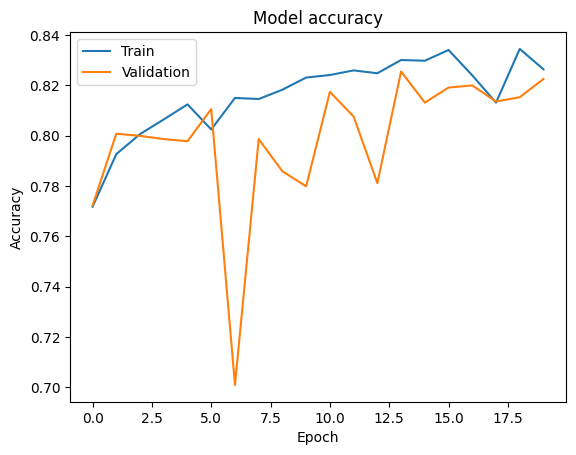

In [7]:
import matplotlib.pyplot as plt

# Plot training & validation accuracy values
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

# Save the trained model
final_model.save('melanocytic_classif_model.keras')


# Parte 2.  Experimentación con libertad de escogencia del tipo de capas

1. En esta segunda implementación puede incluir capas tipo CNN y cualquier otra que considere aporta a la solución.
1. Deben utilizar **una de estas herramientas** para dar seguimiento a los resultados en el caso de la red neuronal artificial -En caso de desear utilizar otra herramienta muy similar, solo solicite de previo autorización al profesor-:
    1. https://www.wandb.com/
    1. https://www.comet.ml/site/

In [9]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout, BatchNormalization

def build_cnn_model():
    model = Sequential()
    
    # max pooling
    model.add(Conv2D(32, (3, 3), activation='relu', input_shape=(128, 128, 3)))
    model.add(MaxPooling2D(pool_size=(2, 2)))
    
    # batch normalization
    model.add(Conv2D(64, (3, 3), activation='relu'))
    model.add(BatchNormalization())
    model.add(MaxPooling2D(pool_size=(2, 2)))
    
    # Third cnn layer
    model.add(Conv2D(128, (3, 3), activation='relu'))
    model.add(MaxPooling2D(pool_size=(2, 2)))

    # Flatten the feature maps into 1D
    model.add(Flatten())
    
    # Fully connected layer with dropout
    model.add(Dense(512, activation='relu'))
    model.add(Dropout(0.5))  # Dropout for regularization
    
    # Output layer for binary classification
    model.add(Dense(1, activation='sigmoid'))
    
    # Compile the model
    model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
    
    return model


In [13]:
from comet_ml import Experiment

# Create a Comet experiment
experiment = Experiment(
    api_key="PlpkGnOY9fq5A1vs3IB2p4kZr",  # Replace with your API key
    project_name="melanocytic-classification", 
    workspace="chrisarrefall"  # Replace with your workspace
)

# Build the CNN model
model = build_cnn_model()

# Train the model and log results to Comet.ml
history = model.fit(X_train, y_train, 
                    epochs=20, 
                    validation_data=(X_val, y_val), 
                    callbacks=[experiment.keras_callback()])


COMET WARNING: To get all data logged automatically, import comet_ml before the following modules: sklearn, keras, tensorflow.
COMET WARNING: As you are running in a Jupyter environment, you will need to call `experiment.end()` when finished to ensure all metrics and code are logged before exiting.


COMET INFO: Experiment is live on comet.com https://www.comet.com/chrisarrefall/melanocytic-classification/7af37ec847884dd591ae8ac97adaa528

COMET INFO: Couldn't find a Git repository in '/mnt/c/Users/chris/Documents/TEC/Maestria/Semestre_4/deep_learning/Tarea_Programada_1' nor in any parent directory. Set `COMET_GIT_DIRECTORY` if your Git Repository is elsewhere.


AttributeError: 'Experiment' object has no attribute 'keras_callback'

In [ ]:
# Evaluate on test set
test_loss, test_accuracy = model.evaluate(X_test, y_test)

# Log final test accuracy
experiment.log_metric('Test Accuracy', test_accuracy)

print(f"Final Test Accuracy: {test_accuracy:.4f}")


In [ ]:
# Plot training & validation accuracy values
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(loc='upper left')
plt.show()

# Plot training & validation loss values
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(loc='upper right')
plt.show()

In [11]:
import wandb
run = wandb.init()
run.log({"test":123})
run.finish()

##Criterios de evaluación:
1. Deben presentar una implementación completa para la Parte 1 y para la Parte 2, en una de estas opciones: pytorch, tensorflow o keras (Claro que pueden usar numpy, pandas y otras bibliotecas más, para todo el tema de carga del dataset, analizarlo y pre-procesarlo). (**30 puntos cada una (total 60 ))**
1. Uso de herramienta de seguimiento de resultados. (**10 puntos**)
1. Uso de herramienta de selección de hiperparámetros. (**10 puntos**)
1. Documentación de decisiones en celdas de texto y comentarios al código. (**10 puntos**)
1. Conclusiones finales: En una celda de texto al final del cuaderno, incluya sus conclusiones más importantes de los experimentos y algunos de los gráficos que genera la herramienta seleccionada, junto con su interpretación de los mismos. (**10 puntos**)